In [1]:
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

## Q1.Simple linear regression model for Delivery time 

In [4]:
del_tim = pd.read_csv('delivery_time.csv')

+ EDA for the Data Set

In [5]:
print(del_tim.head(3))

   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6


In [6]:
print(del_tim.tail(3))

    Delivery Time  Sorting Time
18           8.00             2
19          17.83             7
20          21.50             5


In [7]:
print(del_tim.columns)

Index(['Delivery Time', 'Sorting Time'], dtype='object')


In [8]:
print(del_tim.shape)

(21, 2)


In [9]:
del_tim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [10]:
print(del_tim.describe())

       Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000


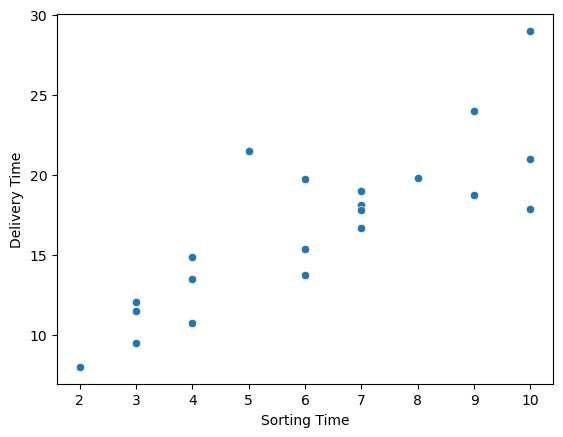

In [11]:
sns.scatterplot(data = del_tim,x=del_tim['Sorting Time'],y=del_tim['Delivery Time'])
plt.show()

## It can be observed from the plot corrosponding to the sorting time of 5 there is a very high Delivery time which is not following the general trend. However, there are certain points have very low delivery time and they also don't follow the trend e.g. 
+  1. Sorting Time = 9 Delivery time <20 and
+  2. Sorting Time = 10 and Delivery time < 23 

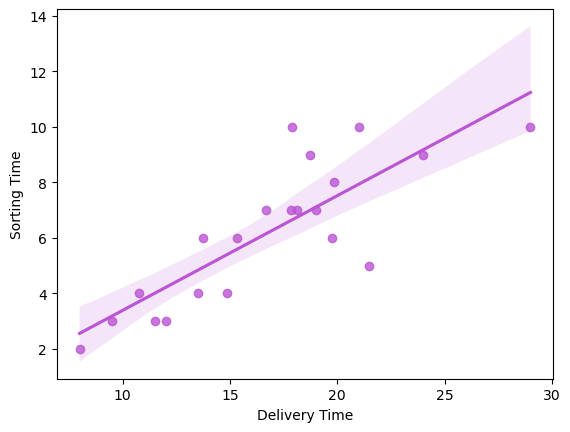

In [12]:
sns.regplot(data =del_tim,x='Delivery Time',y='Sorting Time',color='mediumorchid')
plt.show()

##  Regreession plot also indicate similar observations 

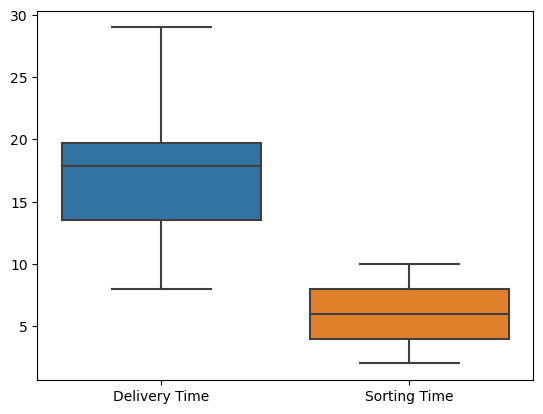

In [13]:
sns.boxplot(data =del_tim)
plt.show()

+ From the Box plot it can be seen that Delivery time data is right skewed 

In [14]:
print(del_tim[del_tim['Sorting Time'] == 5])

    Delivery Time  Sorting Time
20           21.5             5


In [15]:
print(del_tim[del_tim['Sorting Time'] == 9]) # ignoring it because value of Delivery Time is too close to range

   Delivery Time  Sorting Time
3          24.00             9
9          18.75             9


In [16]:
print(del_tim[del_tim['Sorting Time'] == 10])

   Delivery Time  Sorting Time
0           21.0            10
4           29.0            10
8           17.9            10


In [17]:
print(del_tim.head(10))

   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10
5          15.35             6
6          19.00             7
7           9.50             3
8          17.90            10
9          18.75             9


In [18]:
print(del_tim.describe())

       Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000


### Comparing the Percentile values of 'Sorting Time' and "Delivery Time' :- 
+ Data at index = 20 seems outlier (For sorting Time = 5 Delivery Time Should be Some where around 14-18)
+ Data at Index = 8 seems outlier  (For sorting Time = 10 Delivery Time Should be Some where around 20-29)

In [19]:
df = del_tim.copy()

In [20]:
df2 = df.drop(index=[8,20]).reset_index().drop(columns='index')

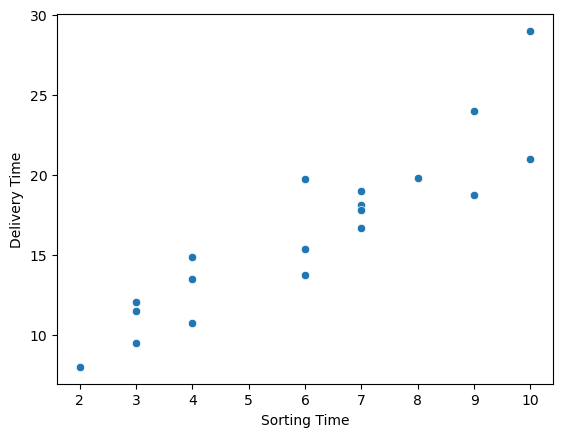

In [21]:
sns.scatterplot(data = df2,x=df2['Sorting Time'],y=df2['Delivery Time'])
plt.show()

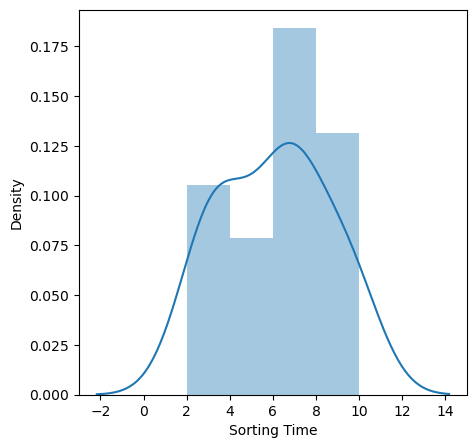

In [22]:
plt.figure(figsize=(5,5))
sns.distplot(df2['Sorting Time'])
plt.show()

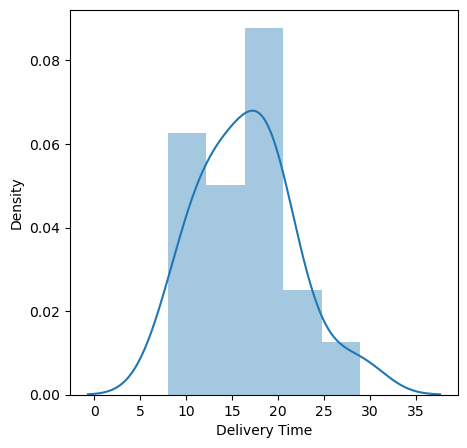

In [23]:
plt.figure(figsize=(5,5))
sns.distplot(df2['Delivery Time'])
plt.show()

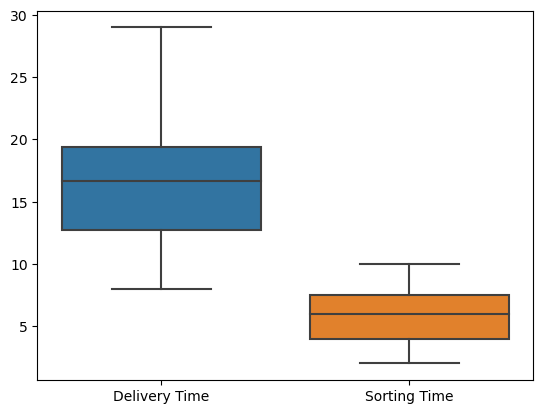

In [24]:
sns.boxplot(data =df2)
plt.show()

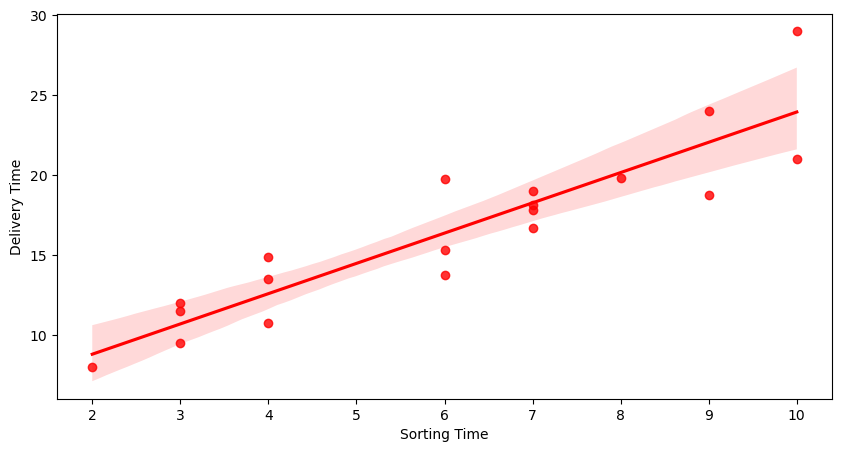

In [25]:
plt.figure(figsize=((10,5)))
sns.regplot(data = df2, x = 'Sorting Time', y= 'Delivery Time',color='r')
plt.show()

## The box plot, distribution plot  and regression plot seem somewhat normal we proceed with model building 

In [26]:
df3 = df2.copy()
df3.columns = ["DT","ST"]

In [27]:
model = smf.ols('DT~ST',data=df3).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     80.30
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           7.54e-08
Time:                        10:17:21   Log-Likelihood:                -41.259
No. Observations:                  19   AIC:                             86.52
Df Residuals:                      17   BIC:                             88.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0332      1.378      3.653      0.002       2.126       7.940
ST             1.8920      0.211      8.961      0.000       1.447       2.337
==============================================================================
Omnibus:                        1.437   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.488   Jarque-Bera (JB):                0.897
Skew:                           0.525   Prob(JB):                        0.639
Kurtosis:                       2.824   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
print(model.tvalues)
print('\n\n')
print(model.pvalues)

Intercept    3.653282
ST           8.960938
dtype: float64



Intercept    1.967637e-03
ST           7.537444e-08
dtype: float64


In [30]:
print(f"""
          R2 value for the model is :- {model.rsquared}
          Adjusted R2 value for the model is :- {model.rsquared_adj}""")


          R2 value for the model is :- 0.8252797811653426
          Adjusted R2 value for the model is :- 0.8150021212338922


## R2 value is very close to 85 % but still less than 85 % so we rescale the data frame

In [31]:
df4 = df3.copy()
df4['DT'] = np.cbrt(df4['DT'])
df4['ST'] = np.sqrt(df4['ST'])
df4.columns = ['cbrt_DT','sqrt_ST']
df4.head()

,cbrt_DT,sqrt_ST
0,2.758924,3.162278
1,2.381102,2.000000
2,2.703060,2.449490
3,2.884499,3.000000
4,3.072317,3.162278


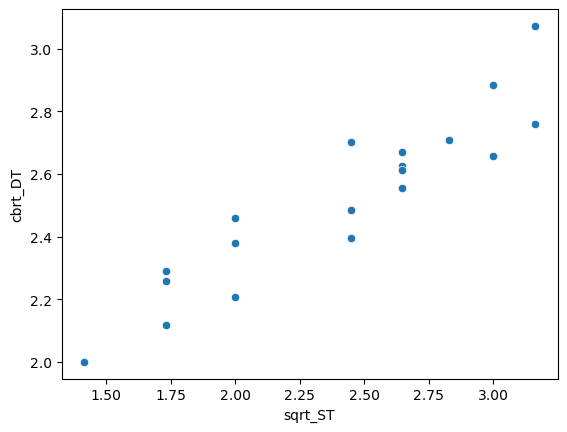

In [32]:
sns.scatterplot(data = df4,x=df4['sqrt_ST'],y=df4['cbrt_DT'])
plt.show()

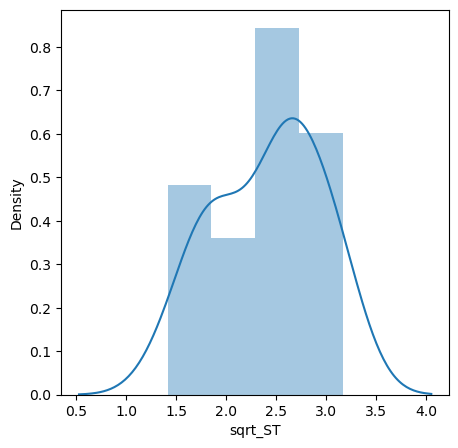

In [33]:
plt.figure(figsize=(5,5))
sns.distplot(df4['sqrt_ST'])
plt.show()

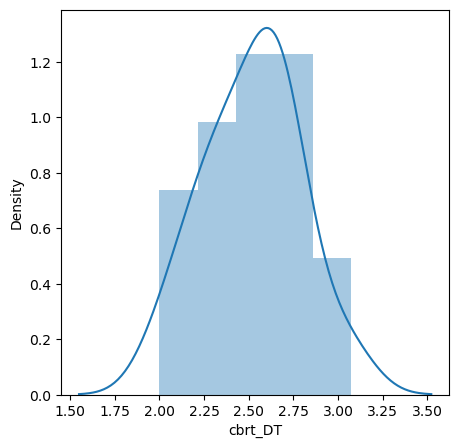

In [34]:
plt.figure(figsize=(5,5))
sns.distplot(df4['cbrt_DT'])
plt.show()

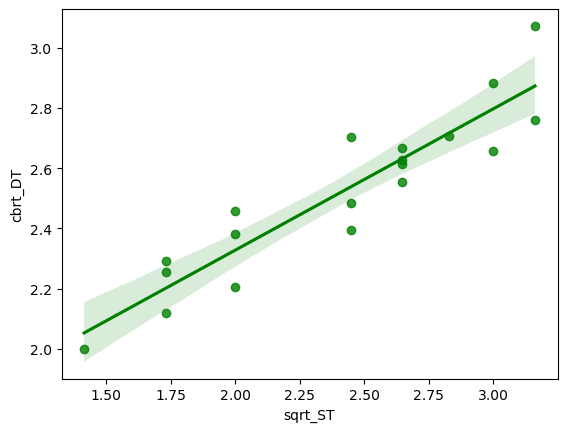

In [35]:
sns.regplot(df4,x='sqrt_ST',y='cbrt_DT',color='g')
plt.show()

In [36]:
model_final = smf.ols('cbrt_DT~sqrt_ST',data = df4).fit()

In [37]:
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                cbrt_DT   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     98.50
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.73e-08
Time:                        10:17:22   Log-Likelihood:                 16.606
No. Observations:                  19   AIC:                            -29.21
Df Residuals:                      17   BIC:                            -27.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3901      0.116     11.960      0.000       1.145       1.635
sqrt_ST        0.4689      0.047      9.925      0.000       0.369       0.569
==============================================================================
Omnibus:                        1.391   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.499   Jarque-Bera (JB):                1.031
Skew:                           0.313   Prob(JB):                        0.597
Kurtosis:                       2.045   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
print(f"Model Coefficients are :- \n{model_final.params}")

Model Coefficients are :- 
Intercept    1.390142
sqrt_ST      0.468905
dtype: float64


In [39]:
print(f"Model T-values:- \n{model_final.tvalues}")
print('\n\n')
print(f"Model P-values:- \n{model_final.pvalues}")

Model T-values:- 
Intercept    11.959826
sqrt_ST       9.924828
dtype: float64



Model P-values:- 
Intercept    1.059183e-09
sqrt_ST      1.729157e-08
dtype: float64


In [40]:
print(f"""
          R2 value for the final model is :- {model_final.rsquared}
          Adjusted R2 value for the final model is :- {model_final.rsquared_adj}""")


          R2 value for the final model is :- 0.852816680786844
          Adjusted R2 value for the final model is :- 0.8441588384801878


In [41]:
pred_data = np.sqrt(pd.DataFrame({'ST':[1,5,10,15,20]}))
pred_data.columns = ['sqrt_ST']
print(pred_data)

    sqrt_ST
0  1.000000
1  2.236068
2  3.162278
3  3.872983
4  4.472136


In [42]:
Delivry_Time = np.power((model_final.predict(pred_data)),3)
result = pd.DataFrame(Delivry_Time,columns=["Delivery Time"])
print(result)

   Delivery Time
0       6.424970
1      14.502610
2      23.712885
3      32.958958
4      42.404489


In [43]:
print(model_final.mse_resid)

0.011393756846524402


In [64]:
print(f"Residual Error for the model is :- \n{np.sqrt(model_final.mse_resid)}")

Residual Error for the model is :- 
0.1067415422716217


## Q2.Simple linear regression model for Salary Hike

In [45]:
sal_hik = pd.read_csv('Salary_Data.csv')

+ EDA for the data

In [46]:
sal_hik.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [47]:
print(sal_hik.shape)

(30, 2)


In [48]:
print(sal_hik.columns)

Index(['YearsExperience', 'Salary'], dtype='object')


In [49]:
sal_hik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [50]:
sal_hik.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [51]:
sal_hik.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


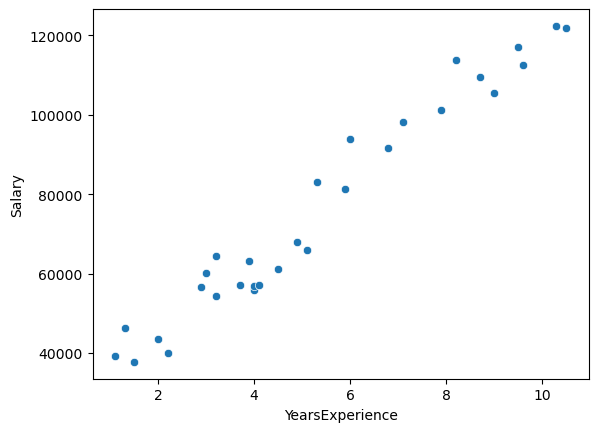

In [52]:
sns.scatterplot(x=sal_hik['YearsExperience'],y=sal_hik['Salary'])
plt.show()

## Strong Possitive correlation between 'Salary' and 'YearsExperience' can be observed 

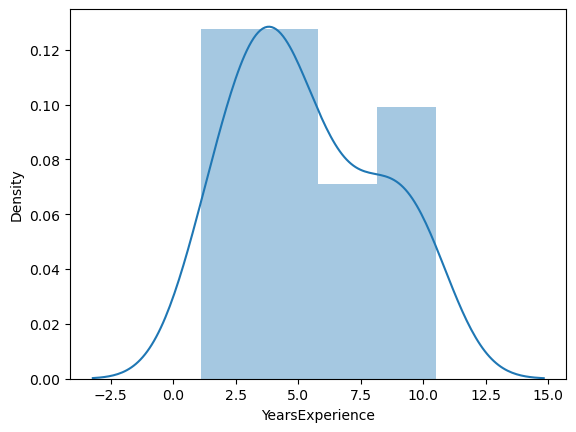

In [53]:
sns.distplot(sal_hik['YearsExperience'])
plt.show()

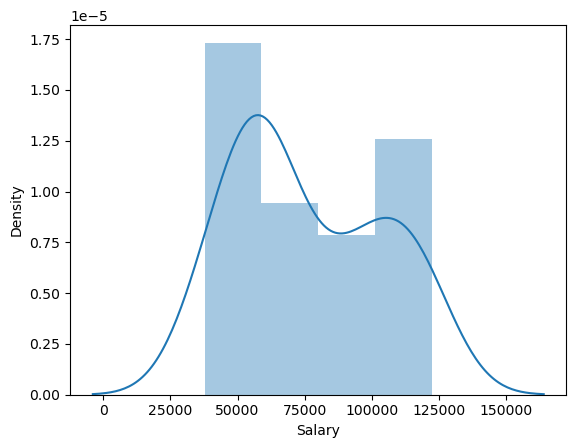

In [54]:
sns.distplot(sal_hik['Salary'])
plt.show()

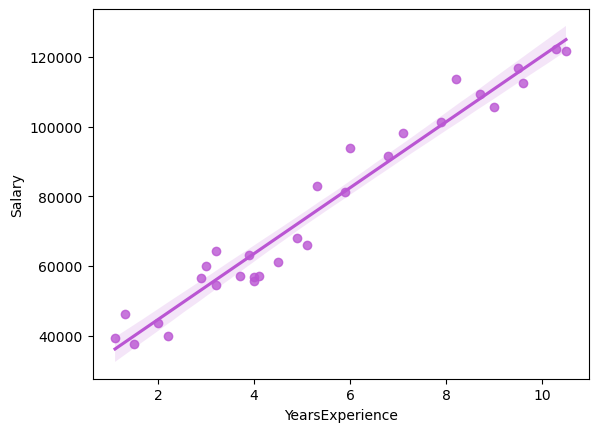

In [55]:
sns.regplot(data = sal_hik,x='YearsExperience',y='Salary',color='mediumorchid')
plt.show()

## Even Though the Data sets are Bi-modal, they seem to have fairly normal distribution, further from the scatter plot and the regression plot it is pretty clear strong possitive correlation between 'YearsExperience" and "Salary"	hence we move ahead to build the model

In [56]:
df = sal_hik.copy()

## Make model    

In [57]:
model = smf.ols('Salary~YearsExperience',data=df).fit()

In [58]:
print(f"Model Parameters are \n{model.params}")

Model Parameters are 
Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64


In [59]:
print(f"R2 value of model is \n{model.rsquared}")

R2 value of model is 
0.9569566641435086


In [60]:
print(f" T-values for the model is:- \n{model.tvalues}")
print('\n\n')
print(f" P-values for the model is:- \n{model.pvalues}")

 T-values for the model is:- 
Intercept          11.346940
YearsExperience    24.950094
dtype: float64



 P-values for the model is:- 
Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [61]:
print(model.mse_resid)

33504591.131015327


In [62]:
# mean Salary of Training Data is 76003
# RMSE is
print(np.sqrt(model.mse_resid))

5788.315051119395


+ RMSE = 5788.32 for mean salary = 76003.0 for training data
+ R2 for model = 95.7

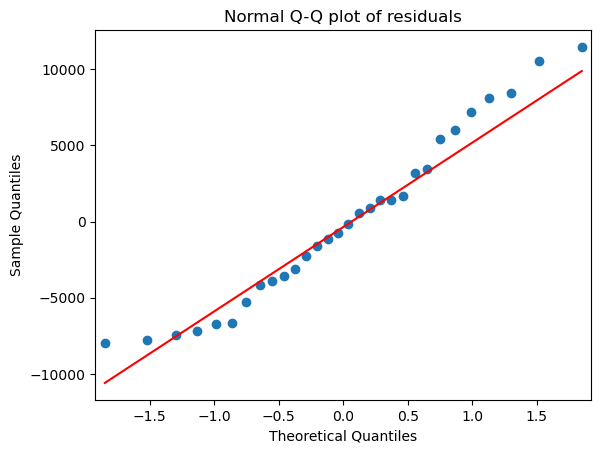

In [63]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()